In [ ]:
# TODO:
# Rename index & columns

In [1]:
# Imports
import matplotlib
import pandas
import IPython

In [2]:
# Read in data
entities = pandas.read_csv('data/entities.csv')
movies   = pandas.read_csv('data/movies.csv')

### release_year vs. release_date.year

In [3]:
def convert_release_date(x):
    try:
        return pandas.to_datetime(x)
    except:
        print(x)
        return None
movies['release_date_2'] = movies['release_date'].apply(convert_release_date)
movies['release_year_2'] = movies['release_date_2'].dt.year    

In [4]:
# release_year: initial release 
# release_date: date of release in USA
# Seems like the USA release year is the year that the movie will be considered for Oscars.
# However, IMDB data does not seem consistent. See: The Hurt Locker & Frost/Nixon, for Best Picture.
IPython.core.display.display(movies[movies['release_year'] != movies['release_year_2']].shape)
IPython.core.display.display(movies[movies['release_year'] != movies['release_year_2']].tail())

(34, 9)

,imdb_id,title,release_year,release_date,duration,mpaa_rating,locations,release_date_2,release_year_2
420,tt1899353,The Raid: Redemption,2011,13 April 2012,1h 41min,R,Indonesia,2012-04-13,2012.0
428,tt2034800,The Great Wall,2016,17 February 2017,1h 43min,PG-13,"Qingdao, China",2017-02-17,2017.0
460,tt2802144,Kingsman: The Secret Service,2014,13 February 2015,2h 9min,R,"Sharpthorne tunnel, Bluebell Railway, West Sus...",2015-02-13,2015.0
492,tt5996252,Trader,1987,NaN,55min,NaN,NaN,NaT,NaN
493,tt6540078,The Child in Time,2017,1 April 2018,1h 30min,NaN,"England, UK",2018-04-01,2018.0


### Plots

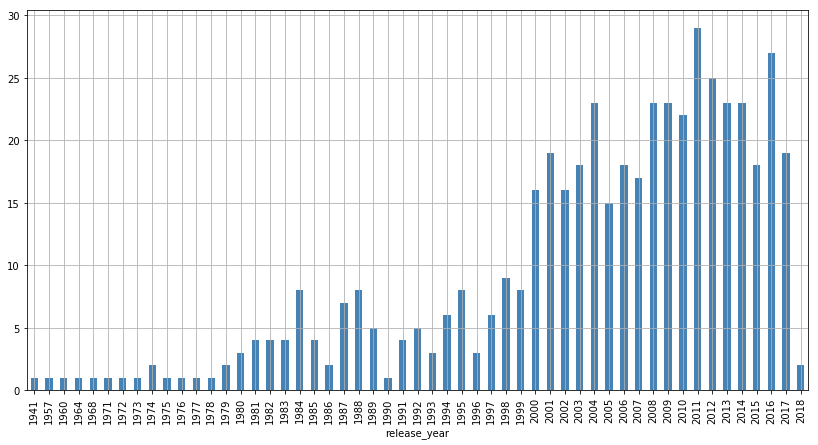

In [5]:
counts_by_release_year = movies.groupby('release_year').count()['imdb_id']
counts_by_release_year.plot.bar(figsize=(14,7), color='steelblue', grid=True)
matplotlib.pyplot.show()

In [6]:
# plot by country?

### Stats

In [7]:
# Most prevalent people
types = entities.query("entity_type in ('director', 'writer', 'actor')")
types = types[['entity_name', 'entity_type']].drop_duplicates()
types = types.groupby('entity_name')['entity_type'].apply(lambda x: ', '.join(x))
types = types.rename('type').to_frame()
entities.query("entity_type in ('director', 'writer', 'actor')") \
        .groupby('entity_name').count()['imdb_id'] \
        .rename('count').to_frame().join(types) \
        [['type', 'count']].sort_values('count', ascending=False).head()

,type,count
entity_name,,
Quentin Tarantino,"actor, director, writer",20
Samuel L. Jackson,actor,16
Seth Rogen,"actor, writer, director",16
Christopher Nolan,"director, writer",15
Matt Damon,"actor, writer",14


In [8]:
# My most-watched directors
entities.query("entity_type == 'director'") \
        .groupby('entity_name').count()['imdb_id'] \
        .sort_values(ascending=False).head().to_frame()

,imdb_id
entity_name,
Steven Spielberg,12
Quentin Tarantino,8
Christopher Nolan,8
Peter Jackson,7
David Fincher,6


In [9]:
# My most-watched writers
entities.query("entity_type == 'writer'") \
        .groupby('entity_name').count()['imdb_id'] \
        .sort_values(ascending=False).head().to_frame()

,imdb_id
entity_name,
Quentin Tarantino,11
George Lucas,8
Andrew Stanton,8
Fran Walsh,7
David S. Goyer,7


In [10]:
# My most-watched actors
entities.query("entity_type == 'actor'") \
        .groupby('entity_name').count()['imdb_id'] \
        .sort_values(ascending=False).head().to_frame()

,imdb_id
entity_name,
Samuel L. Jackson,16
Vin Diesel,13
Brad Pitt,13
Matt Damon,13
Jonah Hill,12


In [11]:
# My most-watched studios
entities.query("entity_type == 'studio'") \
        .groupby('entity_name').count()['imdb_id'] \
        .sort_values(ascending=False).head().to_frame()

,imdb_id
entity_name,
Universal Pictures,58
Warner Bros.,57
Walt Disney Pictures,44
Paramount Pictures,43
Twentieth Century Fox,38


In [12]:
# My top-watched genres
entities.query("entity_type == 'genre'") \
        .groupby('entity_name').count()['imdb_id'] \
        .sort_values(ascending=False).head().to_frame()

,imdb_id
entity_name,
Action,250
Adventure,217
Drama,169
Thriller,167
Sci-Fi,163


In [13]:
# People that have acted & written & directed
entities.groupby('entity_name').nunique()['entity_type'] \
        .sort_values(ascending=False).head().to_frame()

,entity_type
entity_name,
Quentin Tarantino,3
Byron Howard,3
Trey Parker,3
M. Night Shyamalan,3
Shane Black,3


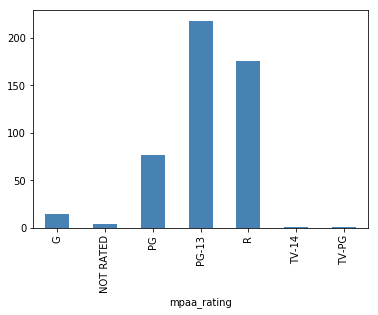

In [14]:
# Distribution by MPAA rating
counts_by_mpaa_rating = movies.groupby('mpaa_rating').count()['imdb_id']
counts_by_mpaa_rating.plot.bar(color='steelblue')
matplotlib.pyplot.show()

### Get directors

In [15]:
directors = entities.query("entity_type == 'director'")
directors = directors.groupby('imdb_id')['entity_name'].apply(lambda x: '; '.join(x))
directors = directors.rename('directors').reset_index()

In [16]:
data = movies.merge(directors)
data = data[['imdb_id', 'title', 'release_year', 'directors']]
data = data.sort_values(data.columns.tolist())

In [17]:
data.tail()

,imdb_id,title,release_year,directors
489,tt4630562,The Fate of the Furious,2017,F. Gary Gray
490,tt4649466,Kingsman: The Golden Circle,2017,Matthew Vaughn
491,tt5013056,Dunkirk,2017,Christopher Nolan
492,tt5996252,Trader,1987,Michael Glyn
493,tt6540078,The Child in Time,2017,Julian Farino


In [18]:
# data.to_csv('directors.csv', index=False)